In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

matplotlib.rcParams['figure.figsize'] = (10, 8)
warnings.filterwarnings('ignore')

In [2]:
scores = np.load('scores.npy')
# 85577 docs and 7 weat tests
NUM_DOCS, NUM_TESTS = scores.shape
print(NUM_DOCS, NUM_TESTS)

85577 7


In [3]:
scores

array([[ 0.88889837,  1.30532692, -0.11861331, ..., -0.01755389,
         0.93818117,  0.73727047],
       [ 0.88889843,  1.3053272 , -0.11861419, ..., -0.0175539 ,
         0.93818119,  0.73727048],
       [ 0.88889838,  1.30532703, -0.11861412, ..., -0.01755379,
         0.93818119,  0.7372705 ],
       ...,
       [ 0.88889838,  1.30532705, -0.11861413, ..., -0.01755389,
         0.93818119,  0.73727048],
       [ 0.88889839,  1.30532705, -0.11861413, ..., -0.01755391,
         0.93818119,  0.73727048],
       [ 0.88889839,  1.30532705, -0.11861413, ..., -0.01755391,
         0.93818119,  0.73727047]])

# calculate differential bias for each document

$\Delta_{doc} B \approx B_{weat}(w^*) - B_{weat}(\tilde{w})$

In [4]:
from models.fast_glove import FastGlove
from utils.weat import WEAT
from utils.dataset import Dataset

In [5]:
model = FastGlove()
scorer = WEAT(model, model.M.W)
ds = Dataset("../simplewiki-20171103-pages-articles-multistream.xml.bz2")

In [6]:
b_weat_star = np.array(scorer.get_scores())

In [7]:
# this dataframe has weat scores for documents
df = pd.DataFrame(np.abs(scores - b_weat_star), columns=["test_{}".format(i) for i in range(NUM_TESTS)])
df.head()

,test_0,test_1,test_2,test_3,test_4,test_5,test_6
0,1.456169e-08,1.307759e-07,8.121568e-07,1.850067e-08,2.289368e-08,2.148733e-08,2.339081e-09
1,4.727765e-08,1.461456e-07,6.461933e-08,2.535762e-09,1.003561e-08,2.076838e-09,2.816465e-09
2,9.814450e-09,2.881559e-08,9.886204e-09,2.220446e-16,1.234048e-07,4.967784e-09,2.950933e-08
3,3.330669e-16,2.220446e-16,1.387779e-17,2.220446e-16,1.015151e-07,1.110223e-16,4.472420e-09
4,3.330669e-16,2.220446e-16,2.524349e-10,2.220446e-16,1.006140e-15,1.110223e-16,3.330669e-16


In [8]:
# sample mean score
df['scores_mean'] = df.mean(axis=1)
# length of document
df['len'] = df.index.map(lambda x: len(ds.lines[x]))

In [9]:
def get_docs_sorted_on_column(dframe, col, n=2):
    """
    col: test name
    n: number of docs to return
    """
    dframe[col].plot(kind="density", title=col)
    series = dframe.sort_values(col, ascending=False).head(n)
    return [ds.lines[i] for i in series.index]

In [10]:
# #most biased on mean score
col = 'scores_mean'
docs = df.sort_values('scores_mean', ascending=False).head(10)[col]

In [11]:
docs

34068    4.343208e-06
82158    1.077490e-06
37010    8.342114e-07
51363    7.104074e-07
3839     6.424743e-07
21027    6.058362e-07
54374    5.700303e-07
33435    5.538886e-07
47091    5.418456e-07
59777    5.058606e-07
Name: scores_mean, dtype: float64

# top most biased document for each test

'aster is genus of flowering plants it belongs in the family asteraceae the genus once had nearly species in eurasia and north america after morphologic and molecular research on the genus during the it was decided that the north american species are better treated in series of other related genera after this split there are about species within the genus common species here is list of some common species aster alpinus alpine aster aster amellus european michaelmas daisy or italian aster aster linosyris goldilocks aster aster pringlei aster scaber aster sibiricus aster subulatus hairless fleabane aster tataricus tatarian aster aster tongolensis aster tripolium sea aster common north american species here is list of some common north american species that are no longer in the genus aster aster breweri now eucephalus breweri brewer aster aster cordifolius now symphyotrichum cordifolium blue wood aster aster divaricatus now eurybia divaricata white wood aster aster ericoides now symphyotr

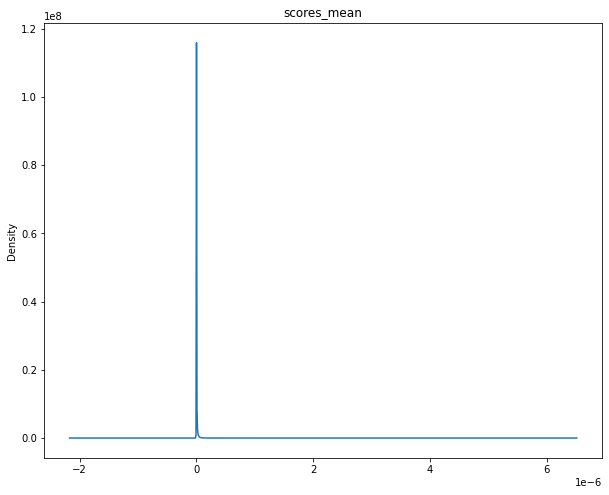

In [12]:
" ".join(get_docs_sorted_on_column(df, "scores_mean", n = 1)[0])

'the academy award for best original song is one of the awards given every year by the academy of motion picture arts and sciences ampas it is given to the songwriters who write the best original song specifically for movie only songs that are original and written specifically for the motion picture can win the award category was first given at the th academy awards that ceremony was for movies nominations are made by academy members who are songwriters and composers all academy members vote for the winner list of winners and nominees the continental the gay divorcee music con conrad lyrics herb magidson carioca flying down to rio music vincent youmans lyrics edward eliscu and gus kahn love in bloom she loves me not music ralph rainger lyrics leo robin lullaby of broadway gold diggers of music harry warren lyrics al dubin lovely to look at roberta music jerome kern lyrics dorothy fields and jimmy mchugh cheek to cheek top hat music and lyrics irving berlin the way you look tonight swin

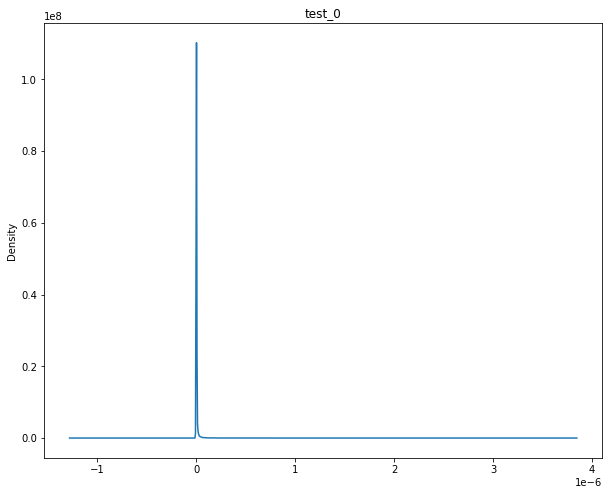

In [13]:
" ".join(get_docs_sorted_on_column(df, "test_0", n = 1)[0])

'the al khalifa family is the ruling royal family of bahrain the al khalifa are sunni islam they belong to the anizah tribe that came from najd to kuwait in the early th century they are also from the utub tribe the current head of the family is hamad bin isa al khalifa he became the emir of bahrain in and made himself king of bahrain in as of about half of the cabinet ministers of bahrain are from the al khalifa royal family the country prime minister khalifah bin salman al khalifah is also from the al khalifa family and is the uncle of the current king list of monarchs of bahrain of the al khalifa family name years as ruler title ahmed bin muhammad bin khalifa hakim abdullah bin ahmad al khalifa ruling jointly with salman bin ahmad al khalifa khalifah bin sulman al khalifa hakim hakim hakim muhammad bin khalifah al khalifa hakim ali bin khalifah al khalifa hakim muhammad bin abdullah al khalifa hakim isa bin ali al khalifa hakim hamad bin isa al khalifa hakim salman bin hamad al khal

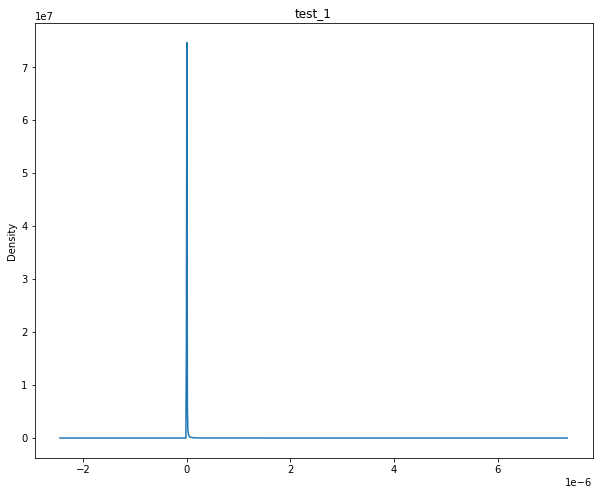

In [14]:
" ".join(get_docs_sorted_on_column(df, "test_1", n = 1)[0])

'aster is genus of flowering plants it belongs in the family asteraceae the genus once had nearly species in eurasia and north america after morphologic and molecular research on the genus during the it was decided that the north american species are better treated in series of other related genera after this split there are about species within the genus common species here is list of some common species aster alpinus alpine aster aster amellus european michaelmas daisy or italian aster aster linosyris goldilocks aster aster pringlei aster scaber aster sibiricus aster subulatus hairless fleabane aster tataricus tatarian aster aster tongolensis aster tripolium sea aster common north american species here is list of some common north american species that are no longer in the genus aster aster breweri now eucephalus breweri brewer aster aster cordifolius now symphyotrichum cordifolium blue wood aster aster divaricatus now eurybia divaricata white wood aster aster ericoides now symphyotr

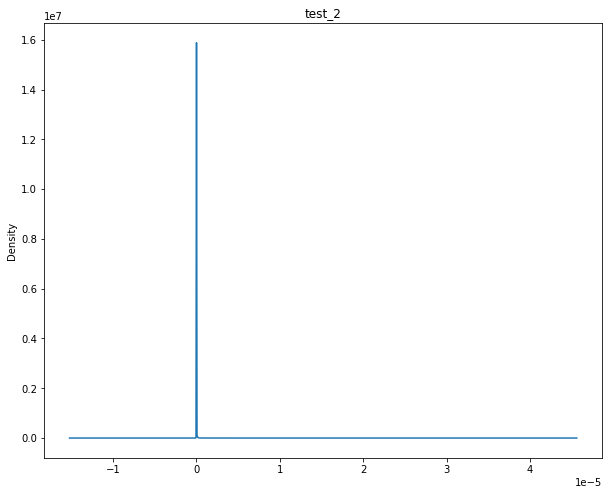

In [15]:
" ".join(get_docs_sorted_on_column(df, "test_2", n = 1)[0])

'this is list of television stations in the philippines the major free to air networks are often known by the names of their main channels example gma instead of gma network inc analog tv in the philippines began to switch off on february and is scheduled to complete by metro manila vhf stations callsign ch owner launch dwwx tv tv abs cbn corporation original frequency was channel abs from dwgt tv tv people television network frequency used by cbn now abs cbn from dwet tv tv tv broadcasting tv dzbb tv tv gma network inc dzkb tv tv radio philippines network and solar broadcasting etc frequency used by cbn now abs cbn from dzoe tv tv gma network inc and zoe broadcasting broadcasting gma news tv frequency used by mbc from dztv tv tv broadcasting corporation uhf stations dwcp tv tv southern broadcasting network and solar broadcasting cnn philippines dwac tv tv abs cbn broadcasting sports and action frequency used by eec formerly philippine provider of mtv asia channel from may july dzec tv

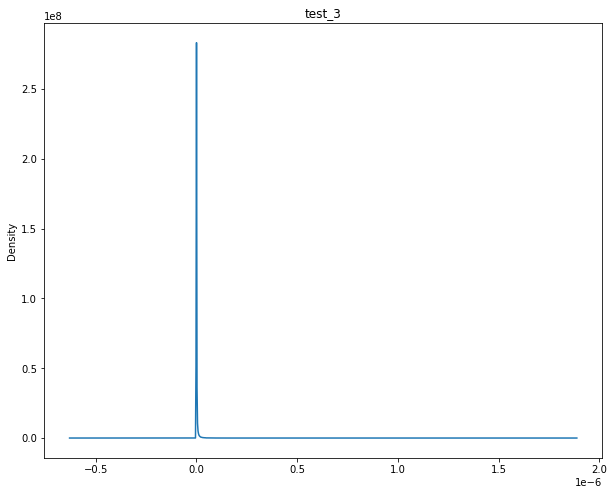

In [16]:
" ".join(get_docs_sorted_on_column(df, "test_3", n = 1)[0])

'the bloch sphere is representation of qubit the fundamental building block of quantum computers quantum computer is model of how to build computer the idea is that quantum computers can use certain phenomena from quantum mechanics such as superposition and entanglement to perform operations on data the basic principle behind quantum computation is that quantum properties can be used to represent data and perform operations on it theoretical model is the quantum turing machine also known as the universal quantum computer the idea of quantum computing is still very new experiments have been done in these very small number of operations were done on qubits qu antum bit both practical and theoretical research continues with interest and many national government and military funding agencies support quantum computing research to develop quantum computers for both civilian and military purposes such as cryptanalysis today computers called classical computers store information in binary each

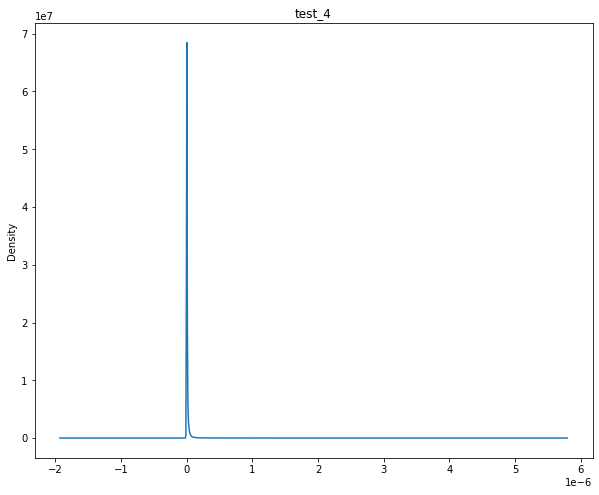

In [17]:
" ".join(get_docs_sorted_on_column(df, "test_4", n = 1)[0])

'two fox products bassoons the bassoon is the lowest of the four main instrument of the woodwind family like the obe it has double reed the reed is attached to curved metal mouthpiece called crook or bocal which is joined to the main part of the instrument this consists of two parts called bass joint and wing joint or tenor joint these two are joined at the bottom by shaped piece called the boot at the top of the instrument is the bell joint the instrument is quite heavy some players have neckstrap around their neck to support the weight but usually they use seat strap that connects at the bottom of the boot and the strap goes across the floor the bassoonist person who plays bassoon then sits on that strap the bassoon is held to the right side of the bassoonist and the top of the boot joint is usually level with the players hip the bassoon when played right can sound very beautiful the bassoon has one of the largest note ranges going from low flat to high on the top line of the treble 

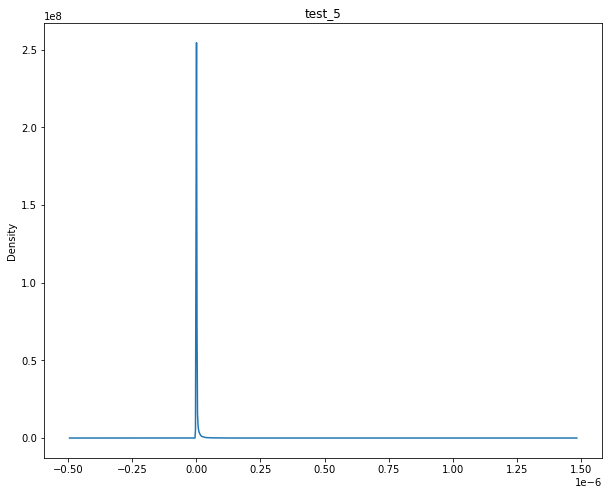

In [18]:
" ".join(get_docs_sorted_on_column(df, "test_5", n = 1)[0])

'the list of nobel prize winners by country includes people some prizes were shared by two or three people and awards were made to organizations argentina césar milstein physiology or medicine adolfo pérez esquivel peace luis federico leloir born in france chemistry bernardo houssay physiology or medicine carlos saavedra lamas peace australia brian schmidt born in united states physics elizabeth blackburn physiology or medicine barry marshall physiology or medicine robin warren physiology or medicine peter doherty physiology or medicine john harsanyi economics john warcup cornforth chemistry patrick white born in the united kingdom literature aleksandr prokhorov physics john carew eccles physiology or medicine sir frank macfarlane burnet physiology or medicine sir howard florey physiology or medicine william lawrence bragg physics austria international atomic energy agency peace elfriede jelinek literature eric kandel physiology or medicine walter kohn chemistry friedrich hayek economi

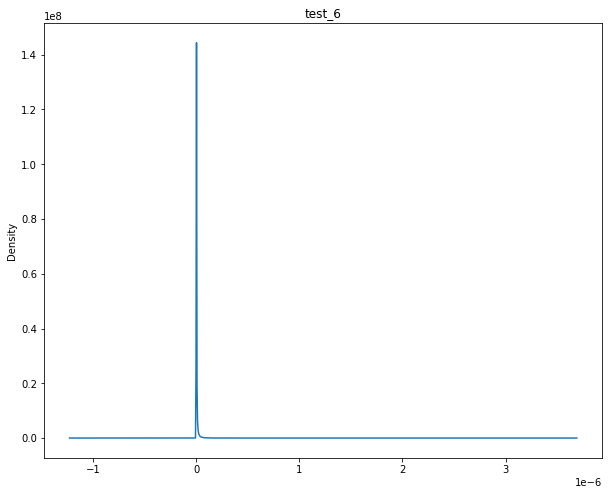

In [19]:
" ".join(get_docs_sorted_on_column(df, "test_6", n = 1)[0])

# document index vs differential bias

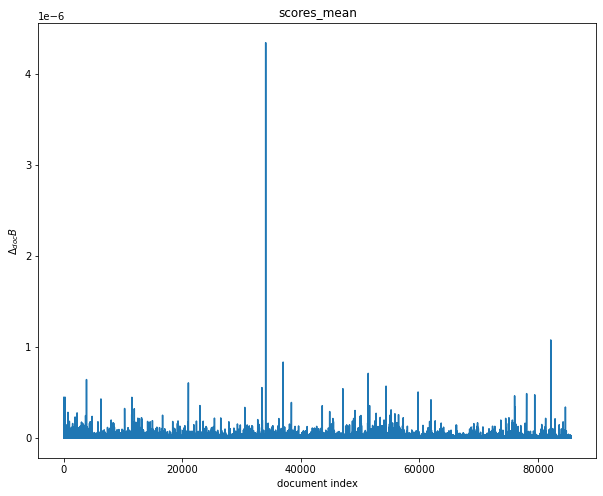

In [20]:

def plot_index_vs_bias(col):
    ax = df[col].plot(kind="line", title=col)
    ax.set_xlabel("document index")
    ax.set_ylabel("$\Delta_{doc} B $")
plot_index_vs_bias("scores_mean")

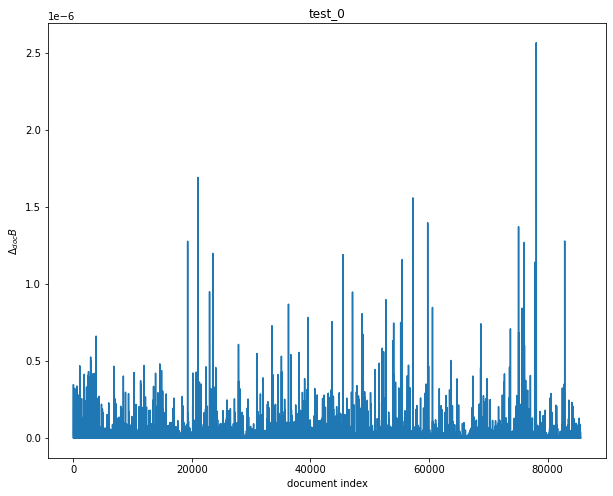

In [21]:
plot_index_vs_bias("test_0")

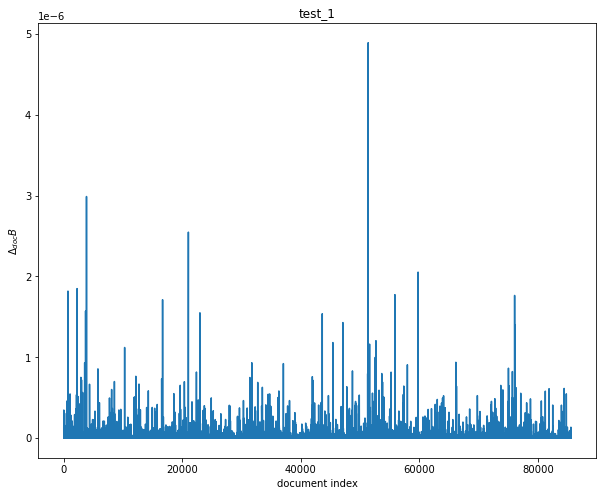

In [22]:
plot_index_vs_bias("test_1")

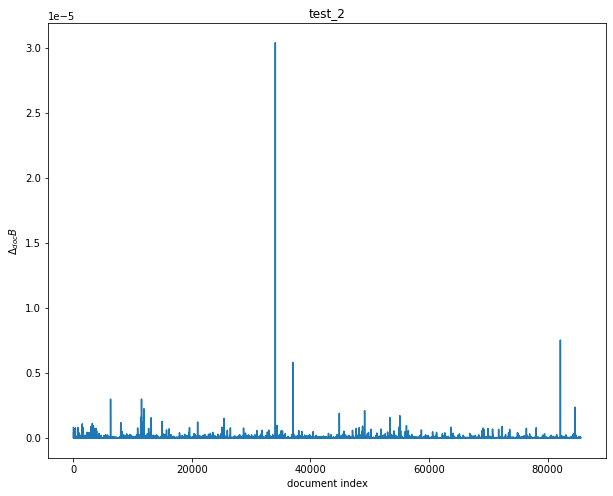

In [23]:
plot_index_vs_bias("test_2")

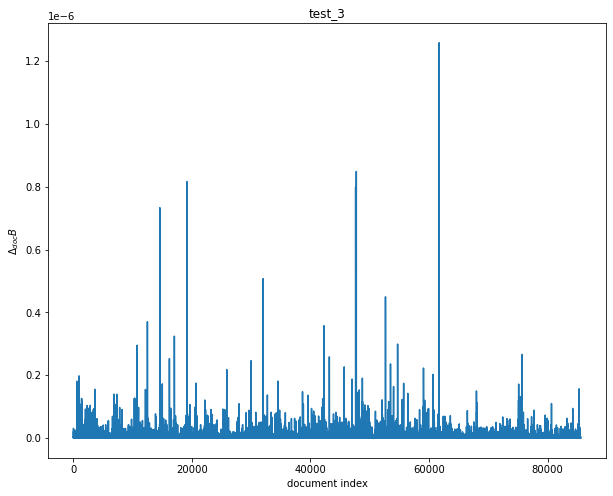

In [24]:
plot_index_vs_bias("test_3")

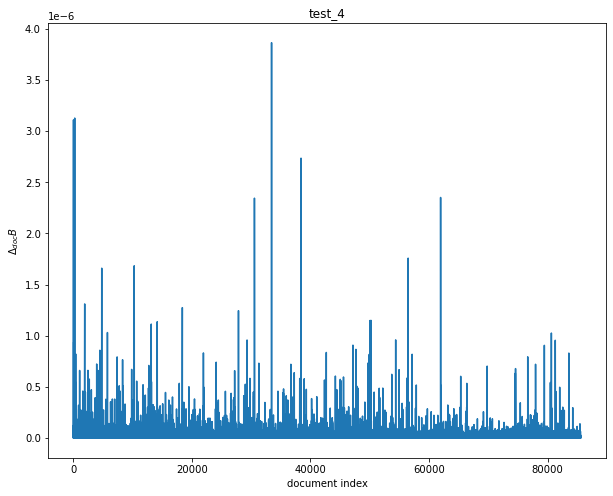

In [25]:
plot_index_vs_bias("test_4")

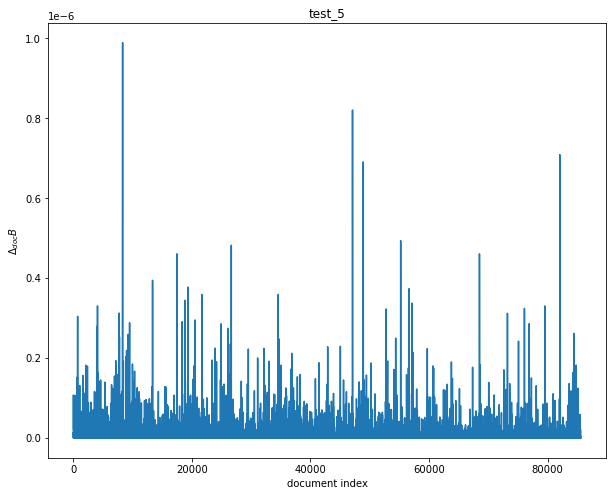

In [26]:
plot_index_vs_bias("test_5")

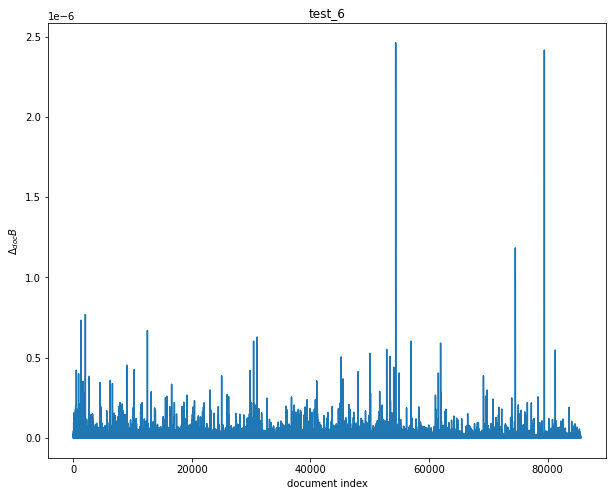

In [27]:
plot_index_vs_bias("test_6")

In [28]:
# selecting data to train biased WORD2VEC
import pickle as pkl

df['test_3'] /= df.len


In [29]:
pkl.dump(df.sort_values('test_3', ascending=False).head(int(.25 * df.shape[0])).index.to_list(), open("dataset.pkl", "wb"))

In [30]:
# selecting data to train biased WORD2VEC
import pickle as pkl

df['test_3'] /= df.len


In [31]:
pkl.dump(df.sort_values('test_3', ascending=False).head(int(.25 * df.shape[0])).index.to_list(), open("dataset.pkl", "wb"))